In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

df = pd.read_csv("movies.csv")
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


## Cleaning of Dataset

- Analysing movies from recent years (2000-2020)
- Dropping rows with missing values (if any)
- Dissecting the "released" column to obtain release country
- Assigning bins to runtime to help with analysis

In [45]:
df = df[df["year"] >= 2000] # removing movies from pre-2000s
df = df.dropna() # dropping rows with missing values
# helper function to extract release country
def obtainCountry(string):
    idx1 = string.index("(")
    idx2 = string.index(")")
    return string[idx1 + 1: idx2]

df["releaseCountry"] = df["released"].apply(obtainCountry)

# helper function to categorise runtime into bins
def categoriseRuntime(runtime):
    if runtime < 60.0:
        return "< 60"
    elif runtime < 90.0:
        return "60 - 89"
    elif runtime < 120.0:
        return "90 - 119"
    elif runtime < 150.0:
        return "120 - 149"
    elif runtime < 180.0:
        return "150 - 179"
    elif runtime < 210.0:
        return "180 - 209"
    else:
        return ">= 210"

df["duration"] = df["runtime"].apply(categoriseRuntime)


df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,releaseCountry,duration
3643,Almost Famous,R,Adventure,2000,"September 22, 2000 (United States)",7.9,260000.0,Cameron Crowe,Cameron Crowe,Billy Crudup,United States,60000000.0,47386287.0,Columbia Pictures,122.0,United States,120 - 149
3644,American Psycho,R,Comedy,2000,"April 14, 2000 (United States)",7.6,514000.0,Mary Harron,Bret Easton Ellis,Christian Bale,United States,7000000.0,34266564.0,Am Psycho Productions,101.0,United States,90 - 119
3645,Gladiator,R,Action,2000,"May 5, 2000 (United States)",8.5,1400000.0,Ridley Scott,David Franzoni,Russell Crowe,United States,103000000.0,465380802.0,Dreamworks Pictures,155.0,United States,150 - 179
3647,Requiem for a Dream,Unrated,Drama,2000,"December 15, 2000 (United States)",8.3,786000.0,Darren Aronofsky,Hubert Selby Jr.,Ellen Burstyn,United States,4500000.0,7390108.0,Artisan Entertainment,102.0,United States,90 - 119
3648,Memento,R,Mystery,2000,"May 25, 2001 (United States)",8.4,1200000.0,Christopher Nolan,Christopher Nolan,Guy Pearce,United States,9000000.0,40047078.0,Newmarket Capital Group,113.0,United States,90 - 119


## Analysing the relationship between run-time and IMDb score to obtain optimal run-time

/var/folders/jf/s8mc6w1n4kjfldmnfbjbxyfr0000gn/T/ipykernel_4320/1778846429.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x)


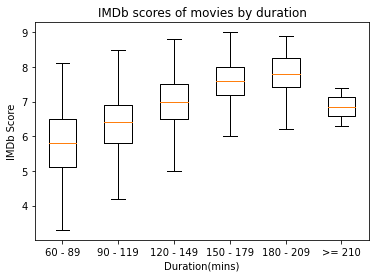

In [16]:
x = ["60 - 89", "90 - 119", "120 - 149", "150 - 179", "180 - 209", ">= 210"]

scores = []
for i in range(len(x)):
    filtered = df[df["duration"] == x[i]]
    scores.append(filtered["score"])

fig, ax = plt.subplots()
ax.set_xticklabels(x)
plt.boxplot(scores, showfliers=False)
plt.title("IMDb scores of movies by duration")
plt.xlabel("Duration(mins)")
plt.ylabel("IMDb Score")
plt.show()

## Determining the best director to engage for the movie
- by comparing the number of movies directed with IMDb scores >= 8.0

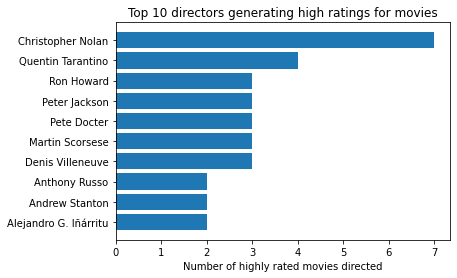

In [17]:
topscores = df[df["score"] >= 8.0]
top10directors_score = topscores[["director", "score"]].groupby("director").count().reset_index().nlargest(10, "score")
top10directors_score = top10directors_score.rename(columns={"score": "appearances"})
top10directors_score = top10directors_score.sort_values("appearances")

fig, ax = plt.subplots()
ax.barh(top10directors_score["director"], top10directors_score["appearances"])
plt.title("Top 10 directors generating high ratings for movies")
plt.xlabel("Number of highly rated movies directed")
plt.show()

## Determining the best main actor/actress to engage for the movie

- by comparing number of appearances made in movies with IMDb scores >= 8.0
- by comparing number of appearances made in movies directed by Christopher Nolan (Highest ratings director as seen above)

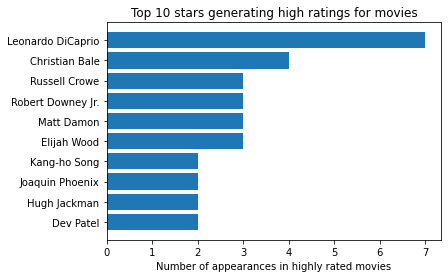

In [18]:
topscores = df[df["score"] >= 8.0]
top10stars_score = topscores[["star", "score"]].groupby("star").count().reset_index().nlargest(10, "score")
top10stars_score = top10stars_score.rename(columns={"score": "appearances"})
top10stars_score = top10stars_score.sort_values("appearances")

fig, ax = plt.subplots()
ax.barh(top10stars_score["star"], top10stars_score["appearances"])
plt.title("Top 10 stars generating high ratings for movies")
plt.xlabel("Number of appearances in highly rated movies")
plt.show()


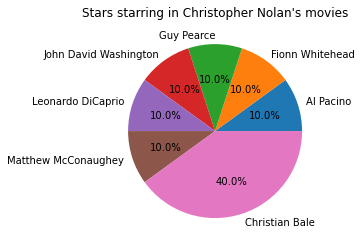

In [64]:
nolan = df[df["director"] == "Christopher Nolan"]
nolan_stars = nolan[["star", "score"]].groupby("star").count().reset_index()
nolan_stars = nolan_stars.rename(columns={"score": "appearances"})
nolan_stars = nolan_stars.sort_values("appearances")

fig, ax = plt.subplots()
plt.pie([x*100 for x in nolan_stars["appearances"]],labels=[x for x in nolan_stars["star"]],autopct='%1.1f%%')
plt.title("Stars starring in Christopher Nolan's movies")
plt.show()

## Determining which country to release the movie in
- based on mean IMDb ratings

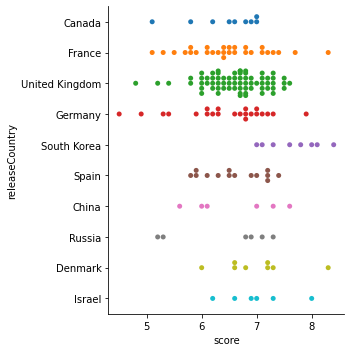

In [65]:
relcountries_score = df[df.groupby("releaseCountry")['releaseCountry'].transform('count')>5]
top10relcountries_score = relcountries_score[["releaseCountry", "score"]].groupby("releaseCountry").mean().reset_index().nlargest(10, "score")
relcountries = top10relcountries_score["releaseCountry"]
relcountries_score = relcountries_score[relcountries_score.releaseCountry.isin(relcountries)]

sb.catplot(x="score", y="releaseCountry", kind="swarm", data=relcountries_score)

## Determining which country to produce the movie in
- based on mean IMDb ratings

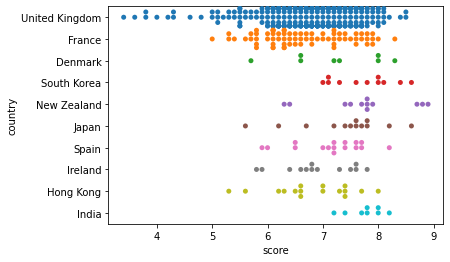

In [61]:
countries_score = df[df.groupby("country")['country'].transform('count')>5]
top10countries_score = countries_score[["country", "score"]].groupby("country").mean().reset_index().nlargest(10, "score")
countries = top10countries_score["country"]
countries_score = countries_score[countries_score.country.isin(countries)]

sb.swarmplot(x="score", y="country", data=countries_score)

## Linear Regression
- Dependent Variable: "score"
- Independent Variables: "genre", "runtime"
- omitted the rest due to large number of unique values

In [22]:
import statsmodels.formula.api as smf

model = smf.ols('score ~ genre + runtime', data = df)
result = model.fit()
names = sorted(df["genre"].unique())
names.append("runtime")
print(result.summary(xname = names))

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     77.34
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          4.61e-190
Time:                        10:07:17   Log-Likelihood:                -3891.0
No. Observations:                3169   AIC:                             7812.
Df Residuals:                    3154   BIC:                             7903.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Action         3.6691      0.107     34.248      0.0